# The Cournot Model


In this project we will analyze the traditionel Cournot model, known from lectures at the Micro 1,2 and 3. In a Cournot the firms competes in quantities thereby choosing the quantites taken into account the best response of the other firms to that quantity. Firstly, we will present the settings of the model followed by a analytic solution. Then we will simplify the settings and analyze a numerical case and examine how the numerical case is affected by the number of firms.

In [43]:
# autoreload modules when code is run
%reload_ext autoreload
%autoreload 2

# Importing useful packages e
import numpy as np
import scipy as sp
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pylab

from ipywidgets import interact, interactive, fixed, interact_manual

import modelproject_B as mpy

# Er nedenstående nødvendige?
from numpy import array
from scipy import linalg
from scipy import optimize

# Sympy package helps writing  

sm.init_printing(use_unicode=True)

from sympy import *

## The setting of the model:

We examine a market with $N$ firms, whom produce the same homogenous good. Furthermore we assume that the aggregate demand of the good $x$ is linearly given by:
$$p(x)=c-x$$
Every firm $i$ has a costfunction given by:
$$C(x_i)=k*x_i^2$$ where the aggregate quantity in the market is given as:
$$x=\sum_{j=0}^N(x_j)$$

We then have that firm $i$ wish to maximize his profitfunction given by:
$$\underset{x_i}{max}: p(\sum_{j=0}^Nx_j)x_i)-C(x_i) =p(x)x_i-C(x_i)$$

So we have that firm $i$ is going to choose how much to produce given what the other firms in the market produces. It is intuitively that for  $N \rightarrow \infty$ 
this modelsetup describes the setting of perfect competition. Futhermore it is intuitive to imagine that for $N\rightarrow 1$ 
the setting describes a monopolistic competition situation. These two outer cases will be examized later in the project.

## Analytical Solution for 2 firms

We will now examine the analytical solution for only 2 firms  (A and B) competiting. We assume that firm a has a cost function given by: $C_A=\frac{k}{2}*x_a^3$. The cost function of firm b: $C_B=k*x_b^2$. 

In [44]:
# Defining the elements in the firms choice

a = sm.symbols('a')
b = sm.symbols('b')
qa, qb = sm.symbols('q_a q_b') 
k = sm.symbols('k')

In [45]:
# We start by defining the linear demand function:
def p_total(qa,qb,a,b):
    return (a-b*(qa+qb))

#Defining the cost function of firm A:
def c_A(qa,k):
    return (k*qa**2)

#Defining the cost function of firm B:
def c_B(qb,k):
    return (k*qb**2)

#The profitfunction of firm A:
def profit_A(qa,qb,a,b,k):
    return (p_total(qa,qb,a,b) * qa - c_A(qa,k))
    
#The profitfunction of firm B:
def profit_B(qa,qb,a,b,k):
    return (p_total(qa,qb,a,b) * qb - c_B(qb,k))

In [46]:
#We will now find the derivative, for which we will use to find the best response functions

foc_a = diff(profit_A(qa,qb,a,b,k),qa)
foc_b = diff(profit_B(qa,qb,a,b,k),qb)
display(foc_a,foc_b)

In [47]:
#We find the best responsefunctions by isolating respectively qa and qb in the above found derivatives
sola = sm.solve(sm.Eq(foc_a,0),qa)[0]
solb = sm.solve(sm.Eq(foc_b,0),qb)[0]
#solb
print("\n Firm A's best response is given by: q_a = " + str(sola) + " and firm B's best response is given by: q_b =" + str(solb) )


 Firm A's best response is given by: q_a = (a - b*q_b)/(2*(b + k)) and firm B's best response is given by: q_b =(a - b*q_a)/(2*(b + k))


In [50]:
#To find the quantity firm A wants to produce we substitute firm B's best response function into firm A's best reponse and then solve for q_a 
sola_subs = foc_a.subs(qb,solb) #substituting the best response function of firm B into the FOC of firm A
sola_subs
q_astar = solve(sola_subs,qa) #Solving for q_a
solb_subs = foc_b.subs(qa,sola) #substituting the best response function of firm A into the FOC of firm B
q_bstar = solve(solb_subs,qb) #Solving for q_b
display ( q_astar, q_bstar) #Showing the optimal quantities

In [48]:
#Here we find the optimal quantities for both firms with another code. The result is identical with the result above. Here we just use that we can solve 2 equation with 2 unknowns.

solve([foc_a, foc_b], [qa, qb]) #solving 2 equations with 2 unknowns 

In [51]:
#We are now able to find the prices the firms will take for the good and the profit each firm get:

#As the above quantities is given as lists we start by defining/converting the list into a float:
type(q_astar)
qqa=q_astar[0]
qqb=q_bstar[0]
#We can now find the price of the good:
print("\n The price of the good: " + str(p_total(qqa,qqb,a,b)) ) 

#We can now find the profit of each firm:
print("\n The profit of A: " + str(simplify(profit_A(qqa,qqb,a,b,k))))
print("\n The profit of B: " + str(simplify(profit_B(qqa,qqb,a,b,k))))


 The price of the good: -2*a*b/(3*b + 2*k) + a

 The profit of A: a**2*(b + k)/(3*b + 2*k)**2

 The profit of B: a**2*(b + k)/(3*b + 2*k)**2


## Numerical Solution 

We will now show the numerical solution for two firms using the functions from modelproject.py. The functions are based on the analytical solution. We will simplyfy the settings by assuming same cost function: cost = k*qi .  

In [52]:
#We start by setting the values:
k = sm.symbols('k')
a = sm.symbols('a')
b = sm.symbols('b')
N= sm.symbols('n') # Number of firms 
qi = sm.symbols('q_i') #quantity of the N firm 

Solution = mpy.solution_cournot(N,qi,a,b,k)
print(Solution[4])


(a**2 - 2*a*k + k**2)/(b*(n**2 + 2*n + 1))



 The total quantity is: 12.67

 The price is: 7.33

 The quantity for firm i is: 6.33

 The the profit for firm i is: 40.11

 The quantity for perfect competition: 19


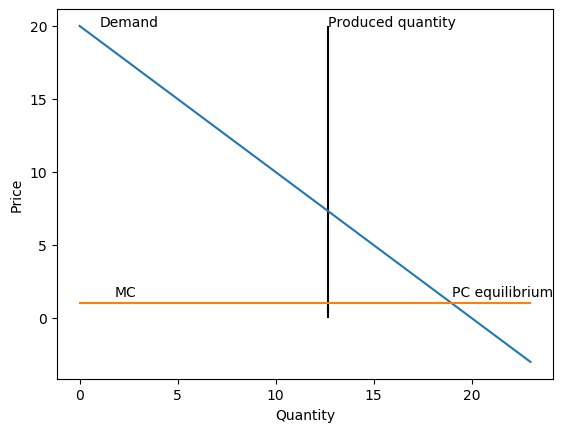

interactive(children=(FloatSlider(value=2.0, description='$Number of firms$', max=10.0, min=2.0), FloatSlider(…

In [58]:
#We start by setting the values:
a = 20
b = 1
k = 1

N = 2 # Number of firms 

#qi = sm.symbols('q_i') #quantity of the i firm 


Solution = mpy.solution_cournot(N,qi,a,b,k)
print('\n The total quantity is: ' + str(round(Solution[1],2)))
print('\n The price is: ' + str(round(Solution[2],2)))
print('\n The quantity for firm i is: ' + str(round(Solution[3],2)))
print('\n The the profit for firm i is: ' + str(round(Solution[4],2)))  

pcquantity = mpy.perfect_com(qi,N,a,b,k)
print('\n The quantity for perfect competition: ' + str(round(pcquantity[0])))
loss = mpy.plot_deadweight_loss(N,qi,a,b,k)


# Forsøg på at lave interaktive plots over både symmetriske og asymmetriske cost functions


In [11]:
# We start by defining the linear demand function:
def invd(q1,q2,d):
    return d - (q1+q2) 

# Defining cost function with symmetric and constant marginal costs 
def scost(q,c):
    return q * c

# Defining the cost functions with assymetric costs

#Disse kunne evt defineres som en, ved at lade konstanten være en parameter

#Defining the cost function of firm A:
def acost_1(qa,c):
    return (c/2) * qa ** 2

#Defining the cost function of firm B:
def acost_2(qb,c):
    return c * qb ** 2

# Profit functions with symmetric costs
#The profitfunction of firm A:
def sprofit_1(q1,q2,d,c):
    return invd(q1,q2,d) * q1 - scost(q1,c)
    
#The profitfunction of firm B:
def sprofit_2(q1,q2,d,c):
    return invd(q1,q2,d) * q2 - scost(q2,c)

# Profit functions with assymetric costs
#The profitfunction of firm A:
def aprofit_1(q1,q2,d,c):
    return invd(q1,q2,d) * q1 - acost_1(q1,c)
    
#The profitfunction of firm B:
def aprofit_2(q1,q2,d,c):
    return invd(q1,q2,d) * q2 - acost_2(q2,c)

In [36]:
sq0 = [1]

def sbest_response1(q2,d,c):
    q1opt = optimize.minimize(lambda sq0: -sprofit_1(sq0,q2,d,c), q0).x[0]
    return q1opt

def sbest_response2(q1,d,c):
    q2opt = optimize.minimize(lambda sq0: -sprofit_2(q1,sq0,d,c), q0).x[0]
    return q2opt

aq0 = [1]

def abest_response1(q2,d,c):
    q1opt = optimize.minimize(lambda aq0: -aprofit_1(aq0,q2,d,c), q0).x[0]
    return q1opt

def abest_response2(q1,d,c):
    q2opt = optimize.minimize(lambda aq0: -aprofit_2(q1,aq0,d,c), q0).x[0]
    return q2opt

[1]


In [27]:
def sconditions(q,parameters):
    u = q[0] - sbest_response1(q[1],parameters[0],parameters[1])
    y = q[1] - sbest_response2(q[0],parameters[0],parameters[2])
    return [u,y]

In [38]:
def aconditions(q,parameters):
    u = q[0] - abest_response1(q[1],parameters[0],parameters[1])
    y = q[1] - abest_response2(q[0],parameters[0],parameters[2])
    return [u,y]

NameError: name 'q2opt' is not defined

In [41]:
# Production vector, initial values:

q = [1,1]

# Here we define the function, f, which contains a solver that solves the Nash equilibrium,
# given the parameters that are chosen in the sliders below.

def f(c1,c2,d):
    parameters = [d,c1,c2]
    solver = optimize.fsolve(aconditions,q,args=(parameters))
    if solver[0] < 0:
        solver[0] = 0
    if solver[1] < 0:
        solver[1] = 0
        
    print("\n Nash Equilibrium: \n The Nash equilibrium, firm 1 produces " + str(round(solver[0],2)) + " units and firm 2 produces " + str(round(solver[1],2)) + " units.")

# Here three sliders are created:
    
widgets.interact(f,
    c1 = widgets.FloatSlider(description="$c_1$",min=0,max=5),
    c2 = widgets.FloatSlider(description="$c_2$",min=0,max=5),
    d = widgets.FloatSlider(description="$d$", min=3,max=5),
 )

interactive(children=(FloatSlider(value=0.0, description='$c_1$', max=5.0), FloatSlider(value=0.0, description…

<function __main__.f(c1, c2, d)>

In [33]:
def g(d,c):
    
# Creating empty box:
    aprod2 = np.arange(0,10,0.1)
    aprod1 = []

    for q2 in aprod2:
        q1 = round(abest_response1(q2,d,c),3)

    # Adding the best response production to the empty box:
        aprod1.append(q1)

    plt.title("Figure 1: Best response for firm 1 (blue) and production level\n for firm 2 (orange), given production level for firm 2")
    plt.ylabel("q")
    plt.xlabel("$q_2$")
    plt.plot(aprod2, aprod1)
    plt.plot(aprod2, aprod2)

widgets.interact(g,
    d = widgets.FloatSlider(description="$d$",min=5,max=10),
    c = widgets.FloatSlider(description="$c$",min=0,max=5)
 )

interactive(children=(FloatSlider(value=5.0, description='$d$', max=10.0, min=5.0), FloatSlider(value=0.0, des…

<function __main__.g(d, c)>

In [7]:
# Here we define different marginal costs and production for firm 1 and 2:

costs = np.arange(0,5,0.1)
prod1 = np.arange(0,5,0.1)
prod2 = np.arange(0,5,0.1)

# Creating empty boxes:

x = []
y = []

for q2 in prod2:
    q1 = round(best_response1(q2,10,0),3)
    x.append(q1)
    
for c, q1 in zip(costs,prod1):
    q2 = round(best_response2(q1,10,c),3)
    y.append(q2)

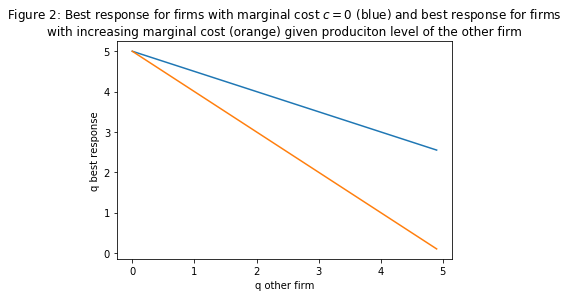

In [8]:
plt.title("Figure 2: Best response for firms with marginal cost $c = 0$ (blue) and best response for firms\nwith increasing marginal cost (orange) given produciton level of the other firm")
plt.ylabel("q best response")
plt.xlabel("q other firm")
plt.plot(costs, x)
plt.plot(costs, y)

In [9]:

prod1 = np.arange(0,5,0.1)
prod2 = np.arange(0,5,0.1)

def f(c1,c2):
#Create empty lists:
    x = []
    y = []

    for q2 in prod2:
        q1 = round(best_response1(q2,10,c1),3)
        x.append(q1) #Adding data to the x-list

    for q1 in prod1:
        q2 = round(best_response2(q1,10,c2),3)
        y.append(q2) #Adding data to the y-list
        
    #Creating figure 3:
    plt.title("Figure 3: Best response for firm 1 with marginal cost $c_1$ (blue) and best response for\nfirm 2 with marginal cost $c_2$ (orange) given produciton level of the other firm")
    plt.ylabel("q best response")
    plt.xlabel("q other firm")
    plt.plot(prod2,x)
    plt.plot(prod1,y)

widgets.interact(f,
    c1 = widgets.FloatSlider(description="$c_1$",min=0,max=5),
    c2 = widgets.FloatSlider(description="$c_2$",min=0,max=5),
 )

interactive(children=(FloatSlider(value=0.0, description='$c_1$', max=5.0), FloatSlider(value=0.0, description…

<function __main__.f(c1, c2)>

# Further analysis

We extend the analysis by looking at firms with assymetric cost functions. We will look at a situation with 2 firms



In [ ]:
# We start by defining the linear demand function:
def p_total(qa,qb,c):
    return (c-(qa+qb))

#Defining the cost function of firm A:
def c_A(qa,k):
    return ((k/2)*qa**2)

#Defining the cost function of firm B:
def c_B(qb,k):
    return (k*qb**2)

#The profitfunction of firm A:
def profit_A(qa,qb,c,k):
    return (p_total(qa,qb,c) * qa - c_A(qa,k))
    
#The profitfunction of firm B:
def profit_B(qa,qb,c,k):
    return (p_total(qa,qb,c) * qb - c_B(qb,k))

In [ ]:
#We start by setting the values:
c=50
k=3

#The derivative:
foc_a = diff(profit_A(qa,qb,c,k),qa)
foc_b = diff(profit_B(qa,qb,c,k),qb)
display(foc_a,foc_b)

#The best responsefunctions 
sola= sm.solve(sm.Eq(foc_a,0),qa)[0]
solb= sm.solve(sm.Eq(foc_b,0),qb)[0]
print("\n Firm A's best response is given by: q_a = " + str(sola) + " and firm B's best response is given by: q_b =" + str(solb) )

solve([foc_a, foc_b], [qa, qb])

# Conclusion